<a href="https://colab.research.google.com/github/VasumathiBurugu/Digit-recognition/blob/master/CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Required Libraries**

In [1]:
!pip install tensorflow


In [2]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [3]:
import tensorflow as tf
print(tf.keras.__version__)


3.8.0


**Import Libraries and Load Datasets**

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist, cifar10

# Load MNIST dataset
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
x_train_mnist = x_train_mnist[..., tf.newaxis] / 255.0  # Add channel dimension and normalize
x_test_mnist = x_test_mnist[..., tf.newaxis] / 255.0

# Load CIFAR-10 dataset
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()
x_train_cifar = x_train_cifar / 255.0  # Normalize
x_test_cifar = x_test_cifar / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
print(x_train_mnist.shape)
print(y_train_mnist.shape)
print(x_test_mnist.shape)
print(y_test_mnist.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [6]:
print(x_train_cifar.shape)
print(y_train_cifar.shape)
print(x_test_cifar.shape)
print(y_test_cifar.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


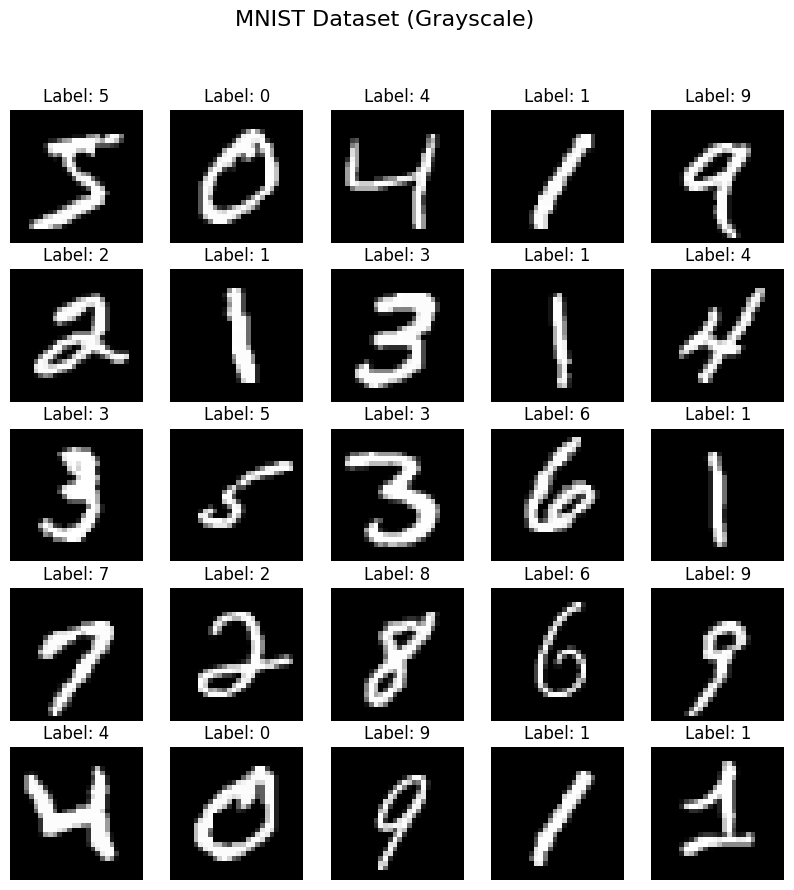

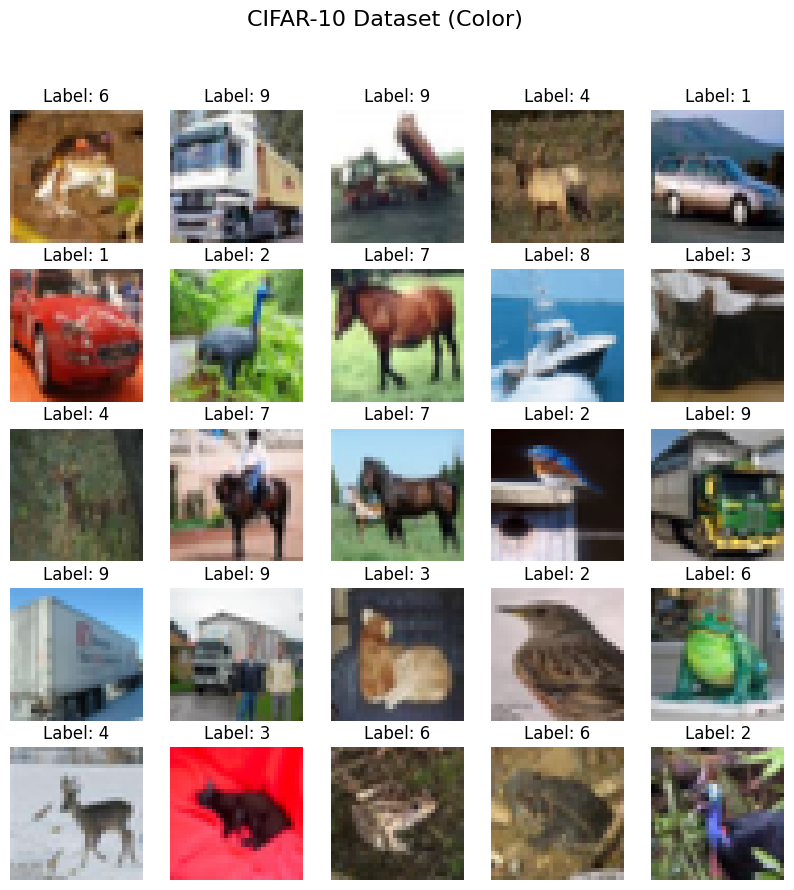

In [7]:
import matplotlib.pyplot as plt

def display_images(dataset, labels, title, num_images=25, dataset_type="grayscale"):
    """
    Displays a grid of images from the dataset.

    Args:
    - dataset: The image dataset (e.g., x_train).
    - labels: Corresponding labels.
    - title: Title for the plot.
    - num_images: Number of images to display (default: 25).
    - dataset_type: "grayscale" or "color" for proper handling of channel dimensions.
    """
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        if dataset_type == "grayscale":
            plt.imshow(dataset[i].squeeze(), cmap="gray")  # Squeeze removes single-channel dimension.
        else:
            plt.imshow(dataset[i])
        plt.title(f"Label: {labels[i].item()}")
        plt.axis("off")
    plt.suptitle(title, fontsize=16)
    plt.show()


# Display 25 random samples from MNIST
display_images(x_train_mnist, y_train_mnist, "MNIST Dataset (Grayscale)", num_images=25, dataset_type="grayscale")

# Display 25 random samples from CIFAR-10
display_images(x_train_cifar, y_train_cifar, "CIFAR-10 Dataset (Color)", num_images=25, dataset_type="color")


**CNN model for MNIST**

In [8]:
# Define CNN model for MNIST (simpler architecture)
from tensorflow.keras import layers, models  # Importing models here

def mnist_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),  # Regularization
        layers.Dense(10, activation='softmax')
    ])
    return model

In [9]:
print(mnist_model)

<function mnist_model at 0x7e597c2d6020>


In [10]:
print(models.Sequential)

<class 'keras.src.models.sequential.Sequential'>


**Compile and train MNIST model**

In [22]:
mnist_cnn = mnist_model()
mnist_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("Training MNIST model...")
history = mnist_cnn.fit(x_train_mnist, y_train_mnist, epochs=5, validation_data=(x_test_mnist, y_test_mnist))

Training MNIST model...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.8755 - loss: 0.3995 - val_accuracy: 0.9857 - val_loss: 0.0444
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9748 - loss: 0.0827 - val_accuracy: 0.9860 - val_loss: 0.0404
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9833 - loss: 0.0556 - val_accuracy: 0.9889 - val_loss: 0.0308
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.9856 - loss: 0.0441 - val_accuracy: 0.9908 - val_loss: 0.0263
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 29ms/step - accuracy: 0.9900 - loss: 0.0337 - val_accuracy: 0.9904 - val_loss: 0.0269


In [23]:
print(type(history.history))

<class 'dict'>


In [24]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [25]:
print(history.history.values())

dict_values([[0.9396166801452637, 0.9769333600997925, 0.984333336353302, 0.985883355140686, 0.9897500276565552], [0.1987699717283249, 0.07655675709247589, 0.053828075528144836, 0.04559781029820442, 0.035006530582904816], [0.9857000112533569, 0.9860000014305115, 0.9889000058174133, 0.9908000230789185, 0.9904000163078308], [0.04443805664777756, 0.040360599756240845, 0.030765417963266373, 0.026339171454310417, 0.02693151868879795]])


In [26]:
mnist_cnn.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

**Evaluate MNIST model**

In [27]:
mnist_loss, mnist_accuracy = mnist_cnn.evaluate(x_test_mnist, y_test_mnist)
print(f"MNIST Test Accuracy: {mnist_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9873 - loss: 0.0353
MNIST Test Accuracy: 0.99


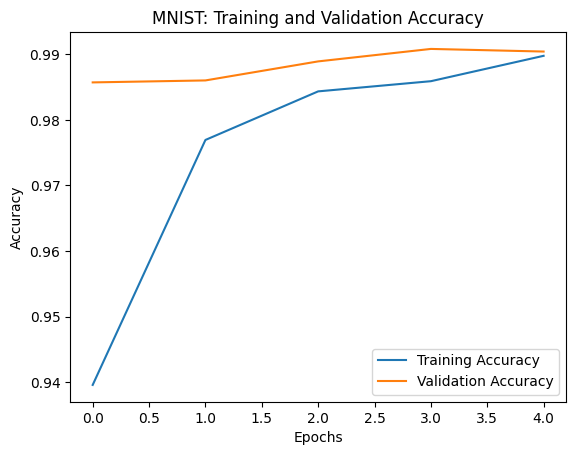

In [28]:
import matplotlib.pyplot as plt

# Now 'history' is defined and you can access its properties
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('MNIST: Training and Validation Accuracy')
plt.show()

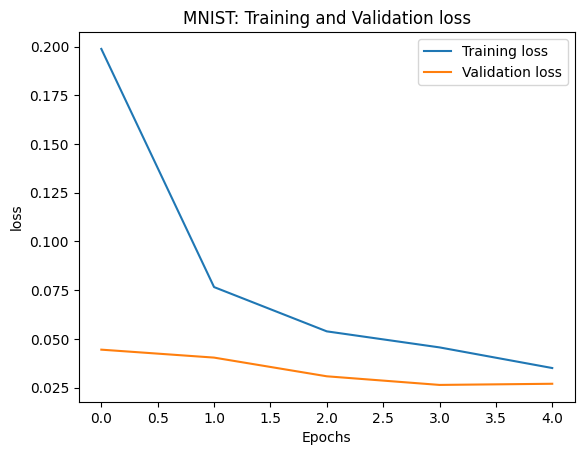

In [29]:
import matplotlib.pyplot as plt

# Now 'history' is defined and you can access its properties
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.title('MNIST: Training and Validation loss')
plt.show()

In [30]:
!pip install scikit-learn  # Install scikit-learn if you haven't already

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step


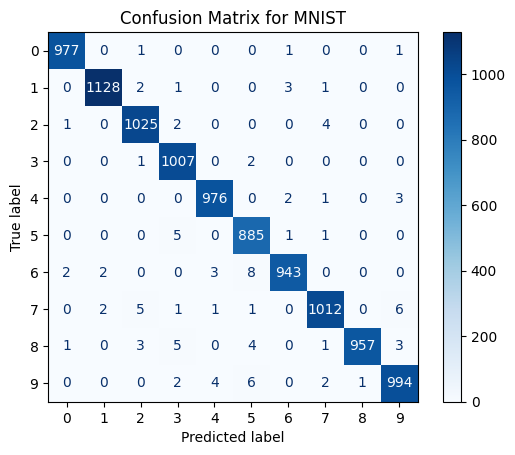

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Import necessary modules

# ... (previous code) ...

# Predict on the test set using the MNIST model (mnist_cnn)
y_pred = mnist_cnn.predict(x_test_mnist)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

# Compute confusion matrix
cm = confusion_matrix(y_test_mnist, y_pred_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for MNIST")
plt.show()

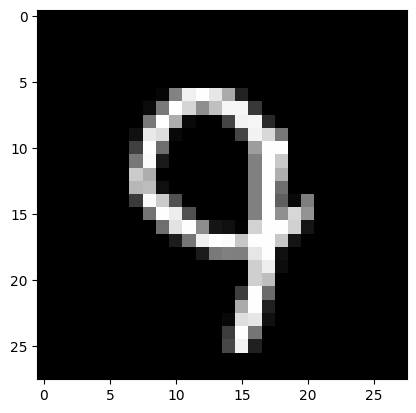

In [32]:
plt.imshow(x_test_mnist[999].reshape(28,28), cmap='gray')

In [33]:
# Predict logits or raw output
predictions = mnist_cnn.predict(x_test_mnist[999].reshape(1, 28, 28, 1))

# Normalize predictions using softmax to ensure they are between 0 and 1
normalized_predictions = tf.nn.softmax(predictions).numpy()

# Display normalized probabilities
print("Normalized Predictions (Probabilities):", normalized_predictions)

# Get the predicted class

predicted_class = tf.argmax(normalized_predictions, axis=1).numpy()[0]
print(f"Predicted class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
Normalized Predictions (Probabilities): [[0.08541568 0.08541564 0.08541694 0.0854352  0.08550493 0.08541571
  0.08541549 0.08579113 0.08546984 0.23071943]]
Predicted class: 9


**CNN model for CIFAR-10**

In [7]:
from tensorflow.keras import layers, models # Import models here

def cifar10_model():
    model = models.Sequential([
        layers.Input(shape=(32, 32, 3)),  # Define input shape using Input layer
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),  # Regularization
        layers.Dense(10, activation='softmax')
    ])
    return model

**Compile and train CIFAR-10 model**

In [8]:
cifar10_cnn = cifar10_model()
cifar10_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("\nTraining CIFAR-10 model...")
History=cifar10_cnn.fit(x_train_cifar, y_train_cifar, epochs=5, validation_data=(x_test_cifar, y_test_cifar))


Training CIFAR-10 model...
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.3100 - loss: 1.8377 - val_accuracy: 0.5392 - val_loss: 1.2824
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5586 - loss: 1.2373 - val_accuracy: 0.6160 - val_loss: 1.0614
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6346 - loss: 1.0306 - val_accuracy: 0.6619 - val_loss: 0.9714
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6810 - loss: 0.9048 - val_accuracy: 0.6938 - val_loss: 0.8907
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7181 - loss: 0.8054 - val_accuracy: 0.7040 - val_loss: 0.8602


In [9]:
print(History.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [10]:
print(History.history.values())

dict_values([[0.4110400080680847, 0.579200029373169, 0.6438599824905396, 0.6861799955368042, 0.7163599729537964], [1.5970237255096436, 1.1849387884140015, 1.0096631050109863, 0.8938978314399719, 0.8089321851730347], [0.5392000079154968, 0.6159999966621399, 0.661899983882904, 0.6937999725341797, 0.7039999961853027], [1.282368779182434, 1.061391830444336, 0.9714229702949524, 0.8906956911087036, 0.8602153062820435]])


In [11]:
print(History.history)

{'accuracy': [0.4110400080680847, 0.579200029373169, 0.6438599824905396, 0.6861799955368042, 0.7163599729537964], 'loss': [1.5970237255096436, 1.1849387884140015, 1.0096631050109863, 0.8938978314399719, 0.8089321851730347], 'val_accuracy': [0.5392000079154968, 0.6159999966621399, 0.661899983882904, 0.6937999725341797, 0.7039999961853027], 'val_loss': [1.282368779182434, 1.061391830444336, 0.9714229702949524, 0.8906956911087036, 0.8602153062820435]}


In [12]:
cifar10_cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,311,488 (5.00 MB)

 Trainable params: 437,162 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 874,326 (3.34 MB)

In [13]:
# Predict on the test set
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Import necessary modules
# ... (rest of your code) ...

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


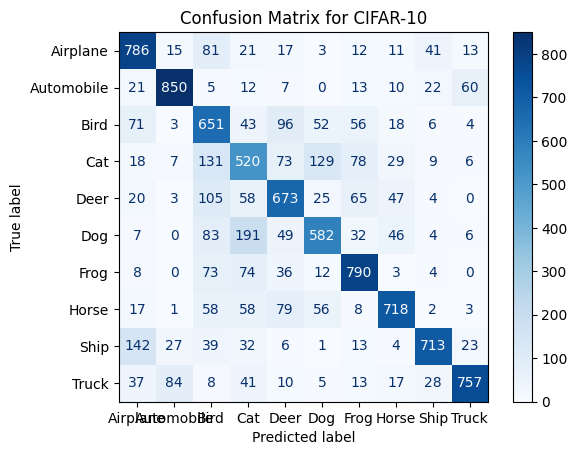

In [14]:
# Predict on the test set
y_pred = cifar10_cnn.predict(x_test_cifar) # Change x_test to x_test_cifar
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()
y_test = y_test_cifar.flatten()  # Change y_test to y_test_cifar and flatten for compatibility

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
    "Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"
])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for CIFAR-10")
plt.show()

**Evaluate CIFAR-10 model**

In [15]:
cifar10_loss, cifar10_accuracy = cifar10_cnn.evaluate(x_test_cifar, y_test_cifar)
print(f"CIFAR-10 Test Accuracy: {cifar10_accuracy:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7028 - loss: 0.8520
CIFAR-10 Test Accuracy: 0.70


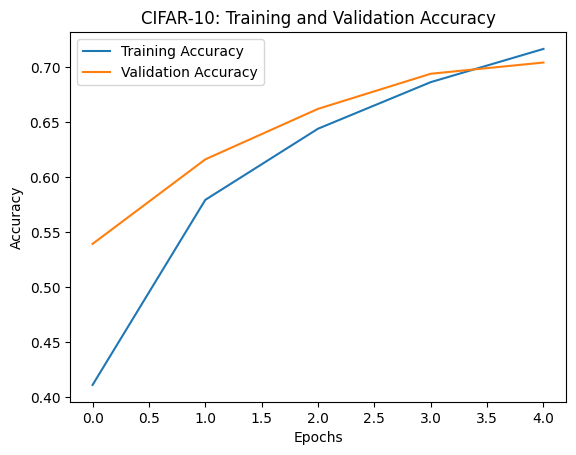

In [16]:
plt.plot(History.history['accuracy'], label='Training Accuracy')
plt.plot(History.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CIFAR-10: Training and Validation Accuracy')
plt.show()

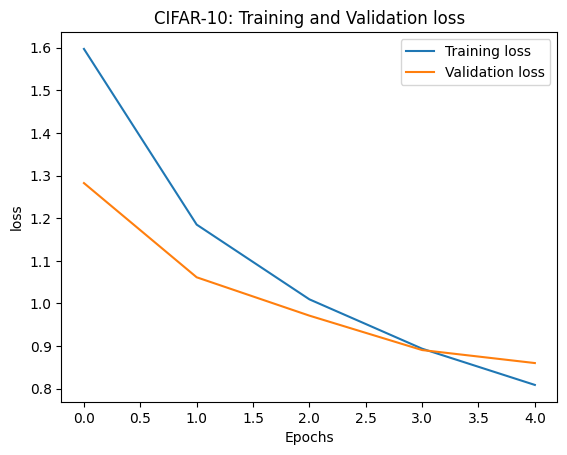

In [17]:
plt.plot(History.history['loss'], label='Training loss')
plt.plot(History.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.title('CIFAR-10: Training and Validation loss')
plt.show()